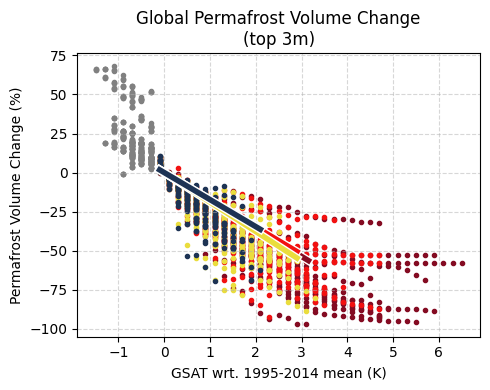

In [2]:
#!/usr/bin/env python3
# -* coding: utf-8 -*

import glob
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

# Regression functions
def linfunc(p, x, y=0): return 100 * (p[0] * x) - y
def expfunc(p, x, y=0): return 100 * (np.exp(p[0] * x) - 1.) - y

# Constants
regression = "linear"
nyrave = 5
mpy = 12
Year0 = 1850
years = [2050, 2090]
scenarios = ["ssp585", "ssp370", "ssp245", "ssp126"]
colors = {"ssp585": "#840b22", "ssp370": "#f21111", "ssp245": "#eadd3d", "ssp126": "#1d3354"}
outliers = {"BCC-CSM2-MR", "CanESM5", "CanESM5-CanOE", "CAMS-CSM1-0"}
tlimreg = 3.0
depth = "3"

# Initialize plot
fig, ax1 = plt.subplots(figsize=(5, 4))

# Main loop over scenarios
for scenario in scenarios:
    color = colors.get(scenario, "black")
    files = sorted(glob.glob(f"pfvolbin-{depth}m/*{scenario}*"))
    nmod = len(files)

    # Model and data initialization
    pfbinarr = []
    tbin, ibin, p1, p2 = None, -1, 0, 0
    GSATave = np.zeros((len(years), nmod), dtype=float)

    for imod, filepath in enumerate(files):
        model = filepath.split("/")[-1].split("_")[1]

        with netCDF4.Dataset(filepath) as f:
            tbin = f.variables['bin'][:]
            dGSAT = f.variables['dGMAT'][:]
            pfbin = f.variables['pfbin'][:] / 1000  # Convert to km³

            # Locate the reference bin
            if ibin == -1:
                for i in range(len(tbin) - 1):
                    if tbin[i] <= 0 <= tbin[i + 1]:
                        ibin = i
                        p1 = tbin[ibin + 1] / (tbin[ibin + 1] - tbin[ibin])
                        p2 = 1 - p1
                        break

            # Normalize permafrost volume
            pfref = p1 * pfbin[ibin] + p2 * pfbin[ibin + 1]
            pfbin = (pfbin - pfref) / pfref * 100
            pfbinarr.append(pfbin)

            # Calculate GSAT averages for specified years
            for iyear, year in enumerate(years):
                mon1 = int((year - Year0) * 12)
                nmext = int((nyrave - 1) * mpy / 2)
                mon_range = slice(max(mon1 - nmext, 0), min(mon1 + nmext + 1, len(dGSAT)))
                GSATave[iyear, imod] = np.mean(dGSAT[mon_range])

    # Historical (tbin <= 0)
    for pfbin in pfbinarr:
        if model not in outliers:
            mask = (tbin <= 0.1) & (np.abs(pfbin) < 100)
            ax1.scatter(tbin[mask], pfbin[mask], c='gray', s=9, alpha=1)

    # Projections (tbin >= 0)
    xrt, yrt = [], []
    for pfbin in pfbinarr:
        if model not in outliers:
            mask_proj = (tbin >= -0.1) & (np.abs(pfbin) < 100)
            ax1.scatter(tbin[mask_proj], pfbin[mask_proj], c=color, s=9, alpha=1)

            # Collect data for regression
            mask_reg = mask_proj & (tbin <= tlimreg)
            xrt.extend(tbin[mask_reg])
            yrt.extend(pfbin[mask_reg])

    # Regression
    xrt, yrt = np.array(xrt), np.array(yrt)
    reg_func = linfunc if regression == "linear" else expfunc
    slope = least_squares(reg_func, [0.], method='lm', args=(xrt, yrt)).x[0]

    # Plot regression
    xr = np.linspace(min(xrt), max(xrt) + (0.25 if scenario == "ssp585" else 0), 100)
    yr = reg_func([slope], xr)
    ax1.plot(xr, yr, color="white", linewidth=6, alpha=1)
    ax1.plot(xr, yr, color=color, linewidth=4, alpha=1)

# Final plot adjustments
ax1.set_xlabel('GSAT wrt. 1995-2014 mean (K)')
ax1.set_ylabel('Permafrost Volume Change (%)')
ax1.set_title(f'Global Permafrost Volume Change\n(top {depth}m)')
ax1.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


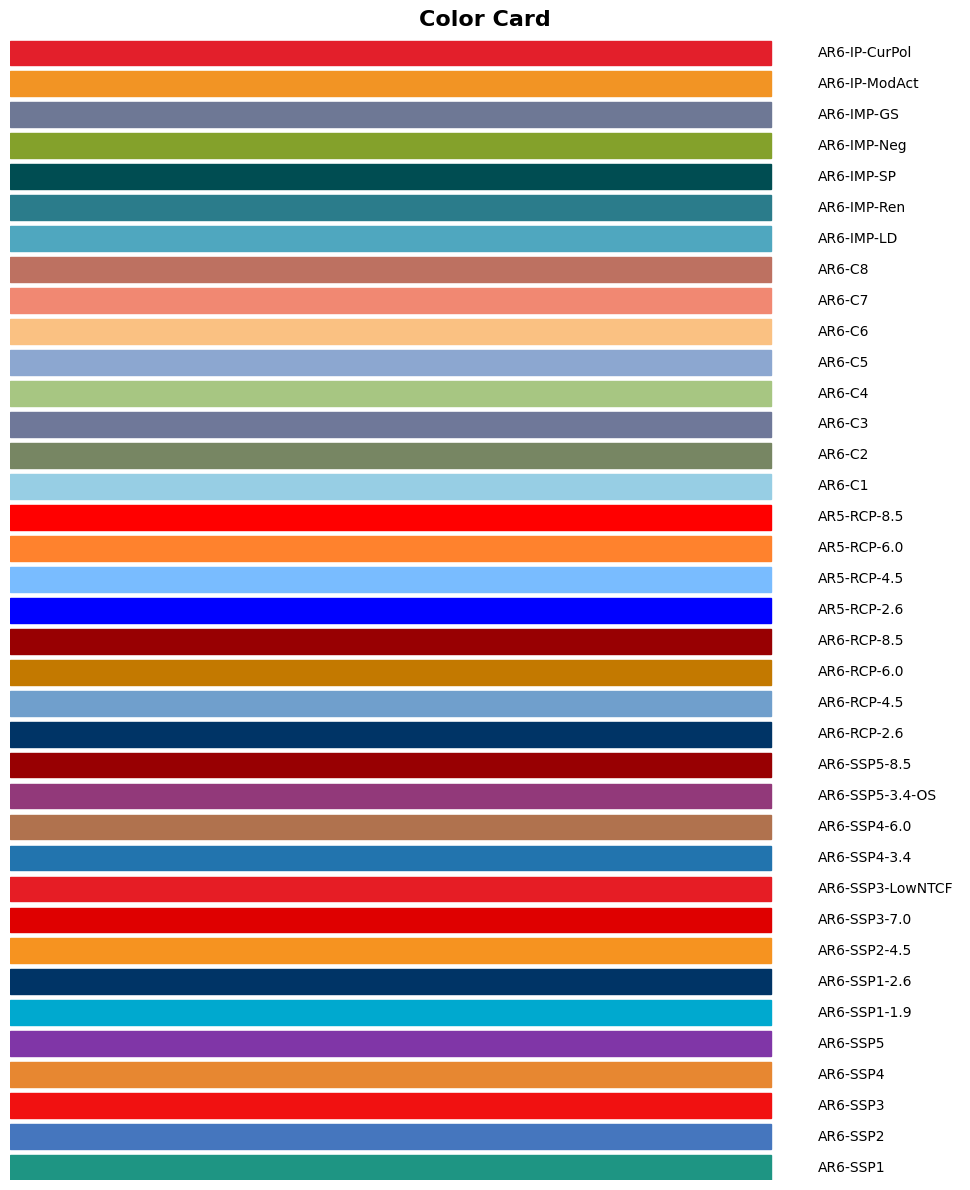

In [18]:
import matplotlib.pyplot as plt

# 配色表
color_data = [
    ("AR6-SSP1", "#1e9583"),
    ("AR6-SSP2", "#4576be"),
    ("AR6-SSP3", "#f11111"),
    ("AR6-SSP4", "#e78731"),
    ("AR6-SSP5", "#8036a7"),
    ("AR6-SSP1-1.9", "#00a9cf"),
    ("AR6-SSP1-2.6", "#003466"),
    ("AR6-SSP2-4.5", "#f69320"),
    ("AR6-SSP3-7.0", "#df0000"),
    ("AR6-SSP3-LowNTCF", "#e61d25"),
    ("AR6-SSP4-3.4", "#2274ae"),
    ("AR6-SSP4-6.0", "#b0724e"),
    ("AR6-SSP5-3.4-OS", "#92397a"),
    ("AR6-SSP5-8.5", "#980002"),
    ("AR6-RCP-2.6", "#003466"),
    ("AR6-RCP-4.5", "#709fcc"),
    ("AR6-RCP-6.0", "#c37900"),
    ("AR6-RCP-8.5", "#980002"),
    ("AR5-RCP-2.6", "#0000FF"),
    ("AR5-RCP-4.5", "#79BCFF"),
    ("AR5-RCP-6.0", "#FF822D"),
    ("AR5-RCP-8.5", "#FF0000"),
    ("AR6-C1", "#97CEE4"),
    ("AR6-C2", "#778663"),
    ("AR6-C3", "#6F7899"),
    ("AR6-C4", "#A7C682"),
    ("AR6-C5", "#8CA7D0"),
    ("AR6-C6", "#FAC182"),
    ("AR6-C7", "#F18872"),
    ("AR6-C8", "#BD7161"),
    ("AR6-IMP-LD", "#4FA7BF"),
    ("AR6-IMP-Ren", "#2B7C8B"),
    ("AR6-IMP-SP", "#004D52"),
    ("AR6-IMP-Neg", "#84A12B"),
    ("AR6-IMP-GS", "#6E7895"),
    ("AR6-IP-ModAct", "#F29424"),
    ("AR6-IP-CurPol", "#E31F2B"),
]

# 绘制色卡
fig, ax = plt.subplots(figsize=(10, 12))
ax.axis('off')
ax.set_xlim(0, 1)
ax.set_ylim(0, len(color_data))

# 绘制每种颜色
for i, (name, color) in enumerate(color_data):
    ax.add_patch(plt.Rectangle((0, i), 0.8, 0.8, color=color))
    ax.text(0.85, i + 0.4, name, va='center', fontsize=10)

ax.set_title("Color Card", fontsize=16, weight="bold")
plt.tight_layout()
plt.show()
